# Learning curves

In the following notebook we will investigate _cross validation_  as a good tool for choosing a model, detecting high bias or high variance problem, or choosing the regularization parameter $\lambda$.

In [654]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(theta, x, y, k=1000, alpha=0.1, lam=0):
    h = lambda theta, x: theta.T @ x
    delta = np.ones(theta.shape)
    delta[0] = 0
    gradJ = lambda theta, x, y: .5 / x.shape[1] * (((h(theta, x) - y) * x).sum(axis=1).reshape(theta.shape) + lam * theta * delta)
    for _ in range(k):
        theta = theta - alpha * gradJ(theta, x, y)
    return theta

def create_polynomial_features(x, degree=1):
    return np.hstack(tuple([x ** i for i in range(degree + 1)])).T

def cost(theta, x, y):
    return (.5 / x.shape[1] * np.sum((theta.T @ x - y) ** 2))

def cross_validation_split(x, y):
    samples = y.size
    id = np.arange(samples)
    np.random.shuffle(id)
    prop = int(70 * samples / 100)
    id_train, id_cv = id[:prop], id[prop:]
    return x[id_train], x[id_cv], y[id_train], y[id_cv]

## Finding model

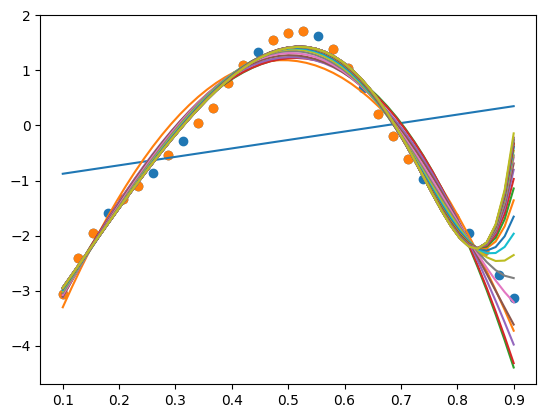

In [657]:
np.random.seed(42)

samples = 31
x = np.linspace(.1, .9, samples).reshape(samples, 1)
y = -30 * (x - 0.3) * (x - 0.7) + .5 * np.sin(15 * x) + 0.1 * np.random.rand(samples, 1)

x_train, x_cv, y_train, y_cv = cross_validation_split(x, y)

fig, ax = plt.subplots()
lin = np.linspace(0.1, .9, 51).reshape(51, 1)
J_train = []
J_cv = []

for i in range(1, 30):
    theta = np.random.rand(i + 1, 1)
    X = create_polynomial_features(x_train, i)
    Y = y_train.T
    theta = gradient_descent(theta, X, Y, k=100_000, alpha=.5)
    J_train.append([i, cost(theta, X, Y)])
    J_cv.append([i, cost(theta, create_polynomial_features(x_cv, i), y_cv.T)])

    ax.plot(lin, create_polynomial_features(lin, i).T @ theta)

ax.scatter(x, y)
ax.scatter(x_train, y_train)
plt.show()


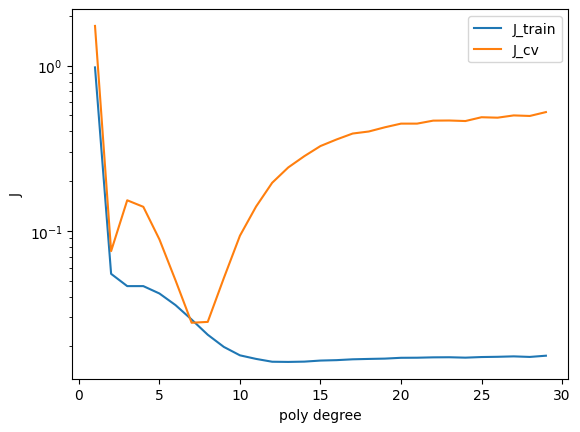

In [658]:
J_train = np.array(J_train)
J_cv = np.array(J_cv)

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(J_train[:, 0], J_train[:, 1], label="J_train")
ax.plot(J_cv[:, 0], J_cv[:, 1], label="J_cv")
ax.legend()
ax.set_xlabel("poly degree")
ax.set_ylabel("J")
plt.show()


## Finding $\lambda$

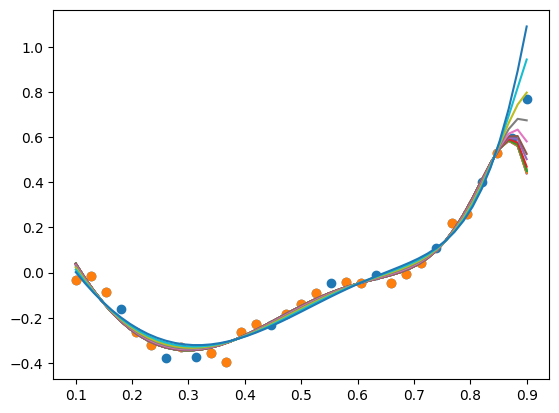

In [671]:
np.random.seed(42)

samples = 31
x = np.linspace(.1, .9, samples).reshape(samples, 1)
y = 3 * x ** 2 - 2 * x + .1 * np.sin(15 * x) + 0.1 * np.random.rand(samples, 1)

x_train, x_cv, y_train, y_cv = cross_validation_split(x, y)

lin = np.linspace(0.1, .9, 51).reshape(51, 1)
J_train = []
J_cv = []

fig, ax = plt.subplots()
for lam in np.logspace(-9, -4, 21):
    i = 21
    theta = np.random.rand(i + 1, 1)
    X = create_polynomial_features(x_train, i)
    Y = y_train.T
    theta = gradient_descent(theta, X, Y, k=1_000_000, alpha=2, lam=lam)
    ax.plot(lin, create_polynomial_features(lin, i).T @ theta)
    J_train.append([lam, cost(theta, X, Y)])
    J_cv.append([lam, cost(theta, create_polynomial_features(x_cv, i), y_cv.T)])

ax.scatter(x, y)
ax.scatter(x_train, y_train)
plt.show()

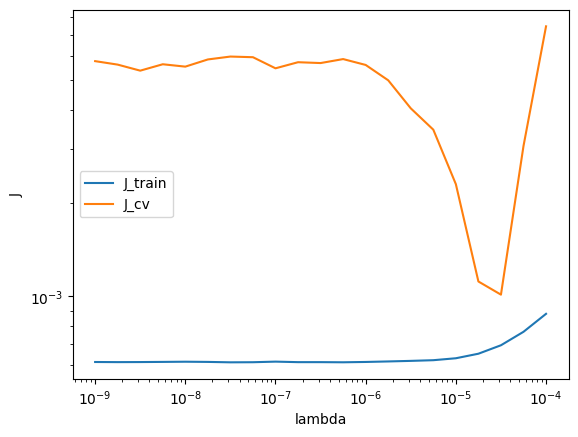

In [672]:
J_train = np.array(J_train)
J_cv = np.array(J_cv)

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(J_train[:, 0], J_train[:, 1], label="J_train")
ax.plot(J_train[:, 0], J_cv[:, 1], label="J_cv")
ax.legend()
ax.set_xlabel("lambda")
ax.set_ylabel("J")
plt.show()

## High bias problem

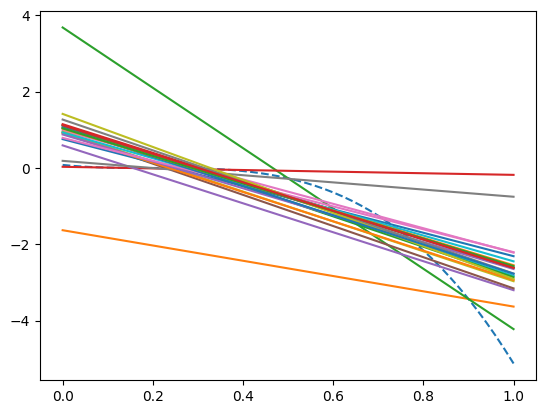

In [675]:
np.random.seed(42)

y = lambda x: -10 * (x - 0.2) ** 3

fig, ax = plt.subplots()
lin = np.linspace(0, 1, 51).reshape(51, 1)
ax.plot(lin, y(lin), '--')

J_train = []
J_cv = []
for samples in np.sort(list(set([int(s) + 1 for s in np.logspace(0, 2, 30)]))):
    x = np.linspace(.1, .9, samples).reshape(samples, 1)
    x_train, x_cv, y_train, y_cv = cross_validation_split(x, y(x))

    theta = np.random.rand(2, 1)
    X = create_polynomial_features(x_train, 1)
    Y = y_train.T
    theta = gradient_descent(theta, X, Y, k=10_000, alpha=.1)
    J_train.append([samples, cost(theta, X, Y)])
    J_cv.append([samples, cost(theta, create_polynomial_features(x_cv, 1), y_cv.T)])

    ax.plot(lin, create_polynomial_features(lin, 1).T @ theta)

plt.show()

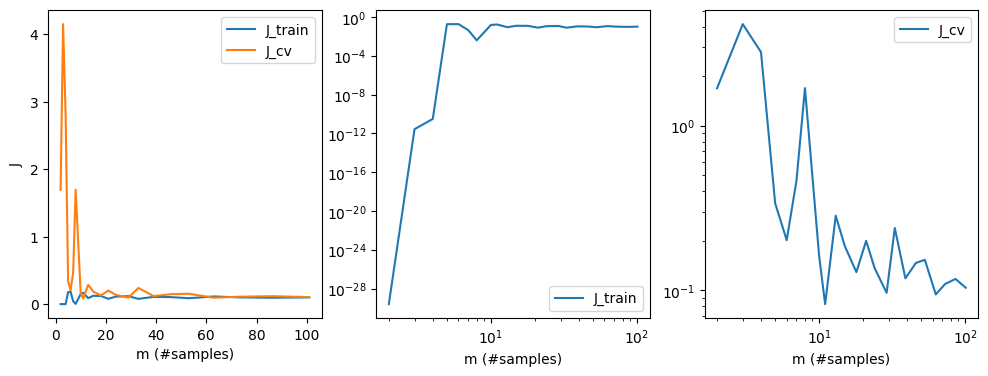

In [676]:
J_train = np.array(J_train)
J_cv = np.array(J_cv)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

#ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

ax1.set_ylabel('J')

ax1.set_xlabel('m (#samples)')
ax2.set_xlabel('m (#samples)')
ax3.set_xlabel('m (#samples)')

ax1.plot(J_train[:, 0], J_train[:, 1], label="J_train")
ax2.plot(J_train[:, 0], J_train[:, 1], label="J_train")
ax1.plot(J_train[:, 0], J_cv[:, 1], label="J_cv")
ax3.plot(J_train[:, 0], J_cv[:, 1], label="J_cv")

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

## High variance problem

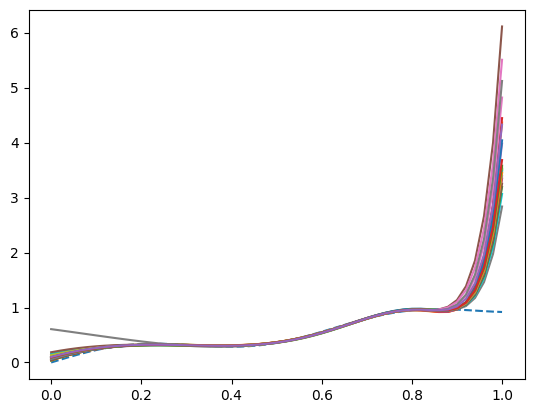

In [686]:
np.random.seed(42)

y = lambda x: x + 0.15 * np.sin(10*x)

fig, ax = plt.subplots()
lin = np.linspace(0, 1, 51).reshape(51, 1)
ax.plot(lin, y(lin), '--')

J_train = []
J_cv = []
for samples in np.sort(list(set([int(s) + 20 for s in np.logspace(0, 2, 31)]))):
    x = np.linspace(.1, .9, samples).reshape(samples, 1)
    x_train, x_cv, y_train, y_cv = cross_validation_split(x, y(x))

    deg = 20
    theta = np.random.rand(deg + 1, 1)
    X = create_polynomial_features(x_train, deg)
    Y = y_train.T
    theta = gradient_descent(theta, X, Y, k=1_000_000, alpha=1)
    J_train.append([samples, cost(theta, X, Y)])
    J_cv.append([samples, cost(theta, create_polynomial_features(x_cv, deg), y_cv.T)])
    ax.plot(lin, create_polynomial_features(lin, deg).T @ theta)
plt.show()

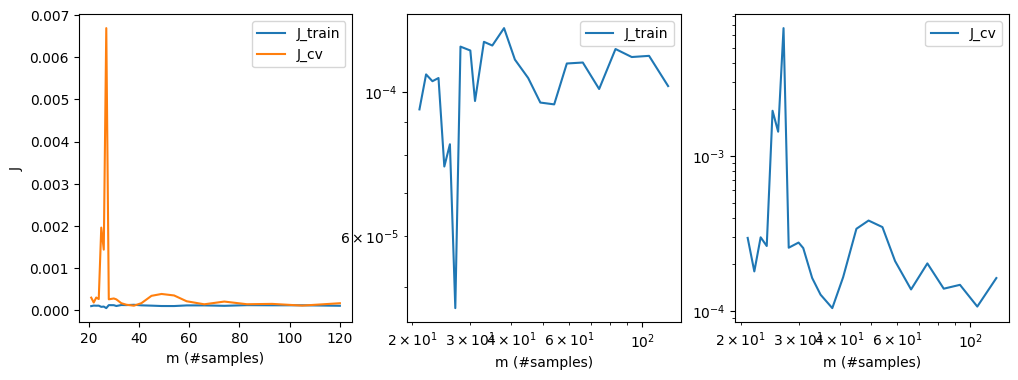

In [687]:
J_train = np.array(J_train)
J_cv = np.array(J_cv)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax2.set_yscale('log')
ax3.set_yscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')

ax1.set_ylabel('J')

ax1.set_xlabel('m (#samples)')
ax2.set_xlabel('m (#samples)')
ax3.set_xlabel('m (#samples)')

ax1.plot(J_train[:, 0], J_train[:, 1], label="J_train")
ax2.plot(J_train[:, 0], J_train[:, 1], label="J_train")
ax1.plot(J_train[:, 0], J_cv[:, 1], label="J_cv")
ax3.plot(J_train[:, 0], J_cv[:, 1], label="J_cv")

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()